## HW4 - poprawa wykresu z uzyciem plotly
*Autor: [Krzysztof Adamczyk](https://github.com/KAdamczykk)*

In [97]:
# pobranie bibliotek
import plotly.graph_objects as go
from ipywidgets import widgets, FloatText
from IPython.display import display, Image
import pandas as pd
import asyncio

### Wykres z błędnymi danymi
Wykres, który znalazłem znajdował się na stronie [Gazety Wyborczej](https://next.gazeta.pl/next/7,151003,27179469,gdybym-ja-zrobil-taki-wykres-stracilbym-prace-tvp-przekracza.html), a dane pochodziły z wydania Wiadomości TVP. Jak widać po dacie 
utworzenia artykułu, są to dane z 2021 roku, co jest ważne w dalszych rozważaniach.

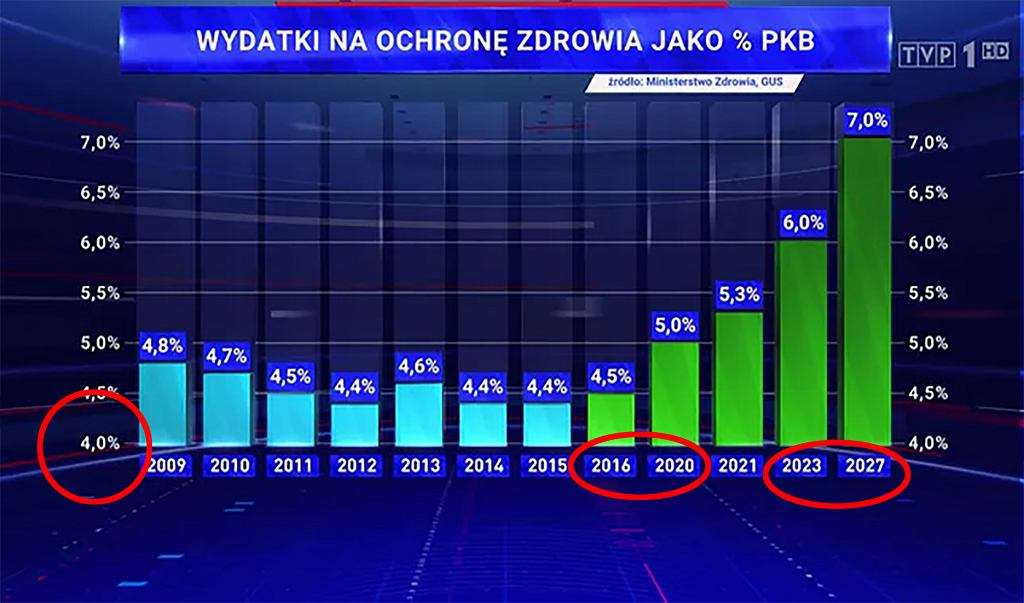

In [98]:
# Orginalny wykres
path = "wrong_plot.jpg"
Image(filename= path)

### Co jest nie tak w tym wykresie?
* skala nie zaczynająca się od 0 tylko od 4%
* brak danych z lat 2017 - 2019
* dane z lat 2023 to dane prognozowane, nie mające pokrycia z tematyką wykresu
* uzycie koloru zielonego od 2016 jako początku rządów PIS, gdzie kolor zielony zazwyczaj ma wywolac w odbiorcy pozytywne odczucia

### Utworzmy animowany, poprawiony wykres
*Informacje o wykresie*

Wykres zawiera poprawione dane, rozszerzone o 3 komponenty służące do animacji i interaktywności wykresu. Są to:
* slider - pozwala wybrac dany zakres lat
* animacja1 - pokazuje zmiany rok po roku dodajac kolejne słupki do wykresu od 2009 do 2021
* animacja2- podobna do animacji1, ale zmienia wartosci w zaleznosci od lat zaznaczonych suwakiem.

In [99]:
# Nanosimy poprawki o dane z GUS-u i uwuwamy zbedne lata
# data frame:
dict1 = {'year': [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
        'Percentage': [4.8, 4.7, 4.5, 4.4, 4.6, 4.4, 4.4, 4.5, 4.73, 4.8, 4.86, 5, 5.3] }
data = pd.DataFrame(dict1)
display(data)

,year,Percentage
0,2009,4.80
1,2010,4.70
2,2011,4.50
3,2012,4.40
4,2013,4.60
5,2014,4.40
6,2015,4.40
7,2016,4.50
8,2017,4.73
9,2018,4.80


In [100]:
# tworzymy wykres
fig = go.FigureWidget()
# dodajmy bary z usunietą legendą, poprawionym kolorem i nanosimy wartosci procentowe na słupki
for index, row in data.iterrows():
        bars = fig.add_trace(go.Bar(
            x=[row['year']],
            y=[row['Percentage']],
            name='Percentage',
            text=[f'{row["Percentage"]}%',], 
            marker_color="green",
            showlegend=False
        ))

# Ustawienia osi i tytułu
fig.update_xaxes(title_text='Rok')
fig.update_yaxes(title_text='Procent wydatkow')



# Funkcja aktualizująca wykres dla suwaka i animacji, ograniczajaca je dla konkretnych lat
def update_chart(start_year, end_year):
    fig.data = []
    filtered_df = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    bars = fig.add_trace(go.Bar(
        x=filtered_df['year'],
        y=filtered_df['Percentage'],
        name='Percentage',
        text=[f'{perc}%' for perc in filtered_df['Percentage']],  
        marker_color="green",
        showlegend=False  
    ))
    fig.update_xaxes(title_text='Rok', tickmode='array', tickvals=data['year'], ticktext=[str(x) for x in data['year']]) # usuniecie nie intow

# Suwak zmieniajacy okres z ktorego bedziemy pobierac dane
slider_range = widgets.IntRangeSlider(
    value=[data['year'].min(), data['year'].max()],
    min=data['year'].min(),
    max=data['year'].max(),
    step=1,
    description='Zakres lat',
    continuous_update=False
)

# Funkcja obsługująca zmiany w suwaku
def on_slider_change(change):
    selected_range = change.new
    update_chart(selected_range[0], selected_range[1])

# Przypisanie funkcji do zmian w suwaku
slider_range.observe(on_slider_change, names='value')

# Animacje dzialajace po wlaczeniu buttona
time = 1 # opoznienie

# Animacja 1: dokladamy kolejne slupki od 2009 roku do 2021
play_button = widgets.Button(description="Animacja 1")

# wywolujemy po kliknieciu na button + opoznienie
async def on_play_button_click1(b):
    fig.data = []
    for year in range(data['year'].min(), data['year'].max() + 1):
        update_chart(2009, year)
        await asyncio.sleep(time)  

# Przypisanie funkcji do kliknięcia przycisku
play_button.on_click(lambda b: asyncio.create_task(on_play_button_click1(b)))

# Animacja 2: dokladamy kolejne slupki w zależnosci od zakresu suwaka
button2 = widgets.Button(description="Animacja 2")

async def on_play_button_click2(b):
    fig.data = []
    min_value, max_value = slider_range.value
    for year in range(min_value, max_value + 1):
        update_chart(min_value, year)
        await asyncio.sleep(time)  

button2.on_click(lambda b: asyncio.create_task(on_play_button_click2(b)))

# Opoznienie - Float text
# Tworzymy nową instancje o domyslnej wartosci 1
fl_text = FloatText(
    value=1, 
    description='Opoznienie:',
)
# zmiana wartosci
def on_fl_text_change(change):
    global time
    time = change.new
# dodanie listenera
fl_text.observe(on_fl_text_change, names='value')

# Wyświetlenie pol i wykresu
display(slider_range)
display(play_button)
display(button2)
display(fl_text)
display(fig)


IntRangeSlider(value=(2009, 2021), continuous_update=False, description='Zakres lat', max=2021, min=2009)

Button(description='Animacja 1', style=ButtonStyle())

Button(description='Animacja 2', style=ButtonStyle())

FloatText(value=1.0, description='Opoznienie:')

FigureWidget({
    'data': [{'marker': {'color': 'green'},
              'name': 'Percentage',
              '…